# Redes neuronales convolucionales 

En este cuaderno vamos a construir redes neurnales convolucionales (_Convolutional Neural Networks_, CNN).

+ Este tipo de redes se caracteriza porque las neuronas de una capa NO se conectan con todas las neuronas de la capa anterior, sino que se conectan a un pequeño grupo de ellas, que además tienen una relación de vecindad.
+ La combinación lineal de las entradas que se realiza dentro de cada neurona se puede interpretar como si los pesos fueran un filtro de convolución (o correlación) y por tanto su salida será alta cuando la vecindad que están evaluando se parece a dicho filtro. 
+ Cuando se aplica a imágenes, el resultado es otra imagen donde las vecindades con mayor intensidad son aquellos que se parecen al filtro. 
+ Si en vez de un único filtro aprendemos varios, entonces estamos extrayendo aquellas características visuales de bajo nivel que se parezcan a los filtros que se aprendan.
+ Las CNN intercalan neuronas convolucionales con etapas de agrupamiento (_pooling_) para aproximar aquellos píxeles resultantes de la convolución que han sido resaltados por los filtros.

---

    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2020, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2020, URJC (Spain)

    alfredo.cuesta@urjc.es    

In [1]:
#-[0]. General purpose packages

import numpy as np
import matplotlib.pyplot as plt

**Cargar el MNIST**

In [2]:
#-[1]. Load images. Keras has a few benchmark datasets readily available.

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#--- Get info of train and test data sets
N_train,dim0,dim1 = x_train.shape
N_test,dim0,dim1  = x_test.shape
num_classes = 10
num_pixels = dim0*dim1

### Construcción de la red
+ Una red convolucional básica (tipo LeNet o AlexNet) tiene:
    + Una capa de entrada
    + Una o varias etapas convolución y agrupamiento
    + Un cabezal clasificador

Keras nos proporciona objetos para replicar esta estructura de capas
+ **La capa de entrada** es similar a la capa de entrada de las redes densas.
+ **Cada etapa de convolución y agrupamiento** consiste en una capa con neuronas convolucionales, con una cierta activación, seguida de una capa de agrupamiento, típicamente _MaxPooling_.
+ **El cabezal clasificador** es una red neuronal para clasificar que utiliza como entrada el mapa de características producido por la última etapa de convolución+agrupamiento serializado

In [3]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

#- Input layer
x = Input( shape=(dim0, dim1, 1) ) 

#- Convolution+Pooling layers
h = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
h = MaxPooling2D((2, 2))(h)
h = Conv2D(16, (3, 3), activation='relu', padding='same')(h)
h = MaxPooling2D((2, 2))(h)
h = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
z = MaxPooling2D((2, 2))(h)

#- Classification header
z = Flatten()(z)
z = Dense(64, activation='relu')(z)
y = Dense(num_classes, activation='softmax')(z)

#- Put all in a model and compile
cnn = Model(x,y)
cnn.compile(optimizer='adam', loss='categorical_crossentropy')
cnn.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)         

## Aprendizaje

**1. Preparamos el conjunto de datos para que pueda ser procesado por el modelo**  <br>
       _En este caso NO hace falta serializar las imágenes ya que la entrada de las CNN es típicamente imágenes._<br>
       Es importante reflejar la profundidad de color. Normalmente será 1 para imágenes en escala de grises y 3 para RGB. <br>
       Pero podría ser otro, por ejemplo 4 para RGB-D
       
**2. Preparamos también el vector de etiquetas para que tenga una representación 1-hot**

In [4]:
x_tensor = x_train.reshape((N_train,dim0,dim1,1))

from tensorflow.keras.utils import to_categorical

y_1hot = to_categorical(y_train, num_classes=num_classes)

**3. Ejecutar el método FIT**<br>estandar
_Tensorflow sigue el estandar de Scikit-Learn. Pero a diferencia de otros métodos que hemos visto de ML, en DL hay que especificar algunas otra opciones como el número de épocas o el tamaño del lote.
+ El **número de épocas** indica cuantas veces se utiliza el conjunto de entrenamiento para realizar el aprendizaje
+ El **tamaño del lote** es el número de muestras que se utilizan para calcular el descenso del gradiente.

In [5]:
# Train the model, iterating on the data in batches of 32 samples

N_epochs = 1
batch_size = 32
cnn.fit(x_tensor, y_1hot, epochs=N_epochs, batch_size=batch_size)

1875/1875 [==============================] - 26s 14ms/step - loss: 0.2883


## Test

8 <-- y
8 <-- yhat


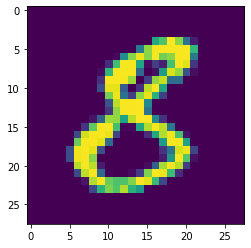

In [18]:
x = x_test.reshape((N_test,dim0,dim1,1))
yhat = cnn.predict(x)

k = 1234
print(y_test[k] ,'<-- y')
print(np.argmax(yhat[k,:]) ,'<-- yhat')
plt.imshow(x_test[k,:,:])

## Ejercicios

1. Encapsular la construcción de la red en dos funciones:
    + Una que reciba las imágenes de entrada y devuelva el mapa de características mediante una serie de etapas convolucionales+agrupamiento
    + Y un cabezal clasificador construido con una *Fully Connected* de 10 salidas (una por clase).

    Interesa que las funciones reciban como argunmento una lista de manera que que podamos configurar diferentes redes al invocarlas
        
        
2. Crear un cabezal regresor utilizando únicamente neuronas convolucionales